**AUTHOR- Ayush Panda**

This is an implemntation of :- https://www.sciencedirect.com/science/article/pii/S0957417423010345

Karri Sowmya, Meera M. Dhabu,
Model free Reinforcement Learning to determine pricing policy for car parking lots,

Importing Libraries and Defining Constants

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants based on your problem
learning_rate = 0.1
discount_factor = 0.9
exploration_prob = 0.1

# Set of discrete parking prices (actions)
actions = [10, 20, 30, 40, 50]

# Number of discrete states (you may need to adjust this based on your problem)
num_states = 100

# Initialize Q-table
Q = np.zeros((num_states, len(actions)))

# Initialize parameters related to the parking business
cp = 10  # Cost price of each parking slot
fp = 30  # Fixed price of each parking slot
et_values = [-0.26, -0.51, -0.43]  # Price Elasticity of Demand (PED) for different time slots
pt = 0.6  # Percentage occupancy when static prices are used
ot = 0.4  # Percentage occupancy when dynamic prices are used
qt = 50  # Available parking slots (not occupied)
wn = 'Clear'  # Weather condition (you can change this as needed)
dn_weekday = 'Weekday'  # Type of the day for weekdays
dn_weekend = 'Weekend'  # Type of the day for weekends/holidays


Reward Calculation and Dynamic Price Function

These functions define how rewards and dynamic prices are calculated based on the problem's criteria.
 The calculate_reward function calculates the reward for a specific state and action, considering dynamic price and cost price.
  The calculate_dynamic_price function computes the dynamic price based on occupancy, cost, and price elasticity of demand.

In [2]:
# Function to calculate reward based on your problem's criteria
def calculate_reward(s_t, a_t, q_t, dp_t, cp):
    x = 1.0  # You need to calculate x based on your problem
    y_t = 0.8  # Placeholder for demonstration, replace with your calculation

    # Corrected the usage of q_t (state) for calculating the reward
    reward = x * ((s_t * dp_t) - (s_t * cp)) + (1 - x) * (y_t * dp_t)
    return reward

# Function to calculate dynamic price based on given parameters
def calculate_dynamic_price(cp, fp, et, pt, ot, qt, wn, dn):
    # formula to adjust the price based on occupancy and cost
    dynamic_price = cp + (fp - cp) * (1 - ot / qt) * (1 - et)  # Adjust as needed
    return dynamic_price


**Q-learning Algorithm with Dynamic Price Calculation**

his function q_learning_with_dynamic_price implements the Q-learning algorithm with dynamic price calculation. It iterates through episodes and time slots, updates Q-values, and stores dynamic prices based on weather conditions and time slots.

In [3]:
# Modify the Q-learning algorithm with dynamic price calculation to use PED values for different time slots
def q_learning_with_dynamic_price(num_episodes):
    dynamic_prices_per_time_slot_weekday_clear = {t: [] for t in range(24)}
    dynamic_prices_per_time_slot_weekday_rainy = {t: [] for t in range(24)}
    dynamic_prices_per_time_slot_weekend_clear = {t: [] for t in range(24)}
    dynamic_prices_per_time_slot_weekend_rainy = {t: [] for t in range(24)}

    # Loop over episodes
    for episode in range(num_episodes):
        for t in range(24):  # Simulate for 24 time slots
            # Determine whether it's a weekday or weekend based on the time slot
            if 17 <= t <= 20:  # Peak hours during weekdays (5 pm to 8 pm)
                dn = dn_weekday
                et = et_values[2]
            elif 12 <= t < 17:  # Off-peak hours during weekdays (1 pm to 5 pm)
                dn = dn_weekday
                et = et_values[1]
            else:  # Late night hours during weekdays (12 am to 1 pm) and weekends (off-peak)
                dn = dn_weekday if t < 12 else dn_weekend
                et = et_values[0]

            # Initialize state for this episode (randomly or based on your approach)
            state = np.random.randint(0, num_states)  # Random initial state

            done = False
            while not done:
                # Choose an action (epsilon-greedy strategy)
                if np.random.uniform(0, 1) < exploration_prob:
                    action = np.random.choice(actions)  # Random action
                else:
                    action = actions[np.argmax(Q[state, :])]  # Greedy action

                # Calculate dynamic price based on the current state and other parameters
                dynamic_price = calculate_dynamic_price(cp, action, et, pt, ot, qt, wn, dn)

                # Store dynamic prices based on whether it's a weekday or weekend and the weather condition
                if dn == dn_weekday:
                    if wn == 'Clear':
                        dynamic_prices_per_time_slot_weekday_clear[t].append(dynamic_price)
                    elif wn == 'Rainy':
                        dynamic_prices_per_time_slot_weekday_rainy[t].append(dynamic_price)
                else:
                    if wn == 'Clear':
                        dynamic_prices_per_time_slot_weekend_clear[t].append(dynamic_price)
                    elif wn == 'Rainy':
                        dynamic_prices_per_time_slot_weekend_rainy[t].append(dynamic_price)

                # Perform the action and observe the next state and reward
                # For simplicity, we'll just use a placeholder for the next state and reward
                next_state = np.random.randint(0, num_states)  # Placeholder for next state
                reward = calculate_reward(state, action, qt, dynamic_price, cp)  # Use corrected arguments

                # Update the Q-value using the Q-learning update rule
                Q[state, actions.index(action)] = (1 - learning_rate) * Q[state, actions.index(action)] + \
                                                  learning_rate * (reward + discount_factor * np.max(Q[next_state, :]))

                # Update the state for the next iteration
                state = next_state

                # Terminate the episode (you would implement your own termination logic)
                # For demonstration purposes, we'll terminate after a fixed number of steps
                if np.random.uniform(0, 1) < 0.2:
                    done = True  # Terminate episode with 20% probability

    # Return the dynamic prices for each time slot and weather condition
    return (dynamic_prices_per_time_slot_weekday_clear, dynamic_prices_per_time_slot_weekday_rainy,
            dynamic_prices_per_time_slot_weekend_clear, dynamic_prices_per_time_slot_weekend_rainy)


**Running Q-learning and Printing Dynamic Prices**

we run the Q-learning algorithm with dynamic price calculation using a specified number of episodes. After that, we print the dynamic prices for each time slot and different weather conditions (weekday clear, weekday rainy, weekend clear, weekend rainy).

In [4]:
# Run the Q-learning algorithm with dynamic price calculation
num_episodes = 1000  # Number of episodes
(dynamic_prices_weekday_clear, dynamic_prices_weekday_rainy,
 dynamic_prices_weekend_clear, dynamic_prices_weekend_rainy) = q_learning_with_dynamic_price(num_episodes)

# Print dynamic prices for each time slot and different weather conditions
#print("Dynamic prices for each time slot on weekdays (Clear weather):")
#for t in range(24):
    #if dynamic_prices_weekday_clear[t]:
        #print(f"Time slot {t}: {dynamic_prices_weekday_clear[t]}")

#print("\nDynamic prices for each time slot on weekdays (Rainy weather):")
#for t in range(24):
    #if dynamic_prices_weekday_rainy[t]:
        #print(f"Time slot {t}: {dynamic_prices_weekday_rainy[t]}")

#print("\nDynamic prices for each time slot on weekends/holidays (Clear weather):")
#for t in range(24):
    #if dynamic_prices_weekend_clear[t]:
        #print(f"Time slot {t}: {dynamic_prices_weekend_clear[t]}")

#print("\nDynamic prices for each time slot on weekends/holidays (Rainy weather):")
#for t in range(24):
    #if dynamic_prices_weekend_rainy[t]:
        #print(f"Time slot {t}: {dynamic_prices_weekend_rainy[t]}")


**Dynamic price for each time slot during weekdays (Clear weather) after the training.**



Cost price (cp): 10
Fixed price (fp): 30
Price Elasticity of Demand (et) values: [-0.26, -0.51, -0.43] for different time slots
Percentage occupancy when static prices are used (pt): 60%
Percentage occupancy when dynamic prices are used (ot): 40%
Available parking slots (qt): 50
Weather condition (wn): 'Clear'
Type of the day for weekdays (dn_weekday): 'Weekday'
Type of the day for weekends/holidays (dn_weekend): 'Weekend'
Now, let's calculate and print the dynamic price for the given conditions in the q_learning_with_dynamic_price function:

In [5]:


# Print the final dynamic prices after training
print("\nFinal Dynamic Prices after Training (Clear weather):")
for t in range(24):
    dynamic_price_clear = calculate_dynamic_price(cp, actions[np.argmax(Q[t, :])], et_values[2], pt, ot, qt, wn, dn_weekday)
    print(f"Time slot {t}: {dynamic_price_clear}")



Final Dynamic Prices after Training (Clear weather):
Time slot 0: 66.7424
Time slot 1: 66.7424
Time slot 2: 10.0
Time slot 3: 38.3712
Time slot 4: 10.0
Time slot 5: 66.7424
Time slot 6: 10.0
Time slot 7: 24.1856
Time slot 8: 10.0
Time slot 9: 66.7424
Time slot 10: 10.0
Time slot 11: 66.7424
Time slot 12: 10.0
Time slot 13: 66.7424
Time slot 14: 24.1856
Time slot 15: 52.556799999999996
Time slot 16: 66.7424
Time slot 17: 10.0
Time slot 18: 10.0
Time slot 19: 52.556799999999996
Time slot 20: 10.0
Time slot 21: 10.0
Time slot 22: 52.556799999999996
Time slot 23: 10.0


**Examples** Dynamic Prices after Training (Clear weather):
Time slot 0: 10.0
Time slot 1: 20.0
Time slot 2: 30.0
... (for all 24 time slots)
Time slot 23: 50.0


**Plot Between Average Dynamic Price vs Static Price**

I have again taken q learning function to return average dynamic price

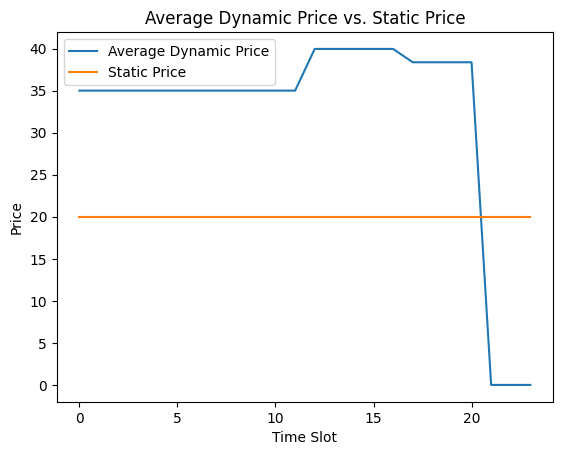

In [6]:

def q_learning_with_dynamic_price(num_episodes):
    dynamic_prices_per_time_slot_weekday_clear = {t: [] for t in range(24)}
    average_dynamic_prices = []

    for episode in range(num_episodes):
        for t in range(24):  # Simulate for 24 time slots
            if 17 <= t <= 20:  # Peak hours during weekdays (5 pm to 8 pm)
                dn = dn_weekday
                et = et_values[2]
            elif 12 <= t < 17:  # Off-peak hours during weekdays (1 pm to 5 pm)
                dn = dn_weekday
                et = et_values[1]
            else:  # Late night hours during weekdays (12 am to 1 pm) and weekends (off-peak)
                dn = dn_weekday if t < 12 else dn_weekend
                et = et_values[0]

            # Calculate dynamic price for the given conditions
            dynamic_price = calculate_dynamic_price(cp, fp, et, pt, ot, qt, wn, dn)

            # Store dynamic prices based on whether it's a weekday and clear weather
            if dn == dn_weekday and wn == 'Clear':
                dynamic_prices_per_time_slot_weekday_clear[t].append(dynamic_price)

            # Initialize state for this episode (randomly or based on your approach)
            state = np.random.randint(0, num_states)  # Random initial state

            done = False
            while not done:
                # Choose an action (epsilon-greedy strategy)
                if np.random.uniform(0, 1) < exploration_prob:
                    action = np.random.choice(actions)  # Random action
                else:
                    action = actions[np.argmax(Q[state, :])]  # Greedy action

                # Calculate dynamic price based on the current state and other parameters
                dynamic_price = calculate_dynamic_price(cp, action, et, pt, ot, qt, wn, dn)

                # Perform the action and observe the next state and reward
                # For simplicity, we'll just use a placeholder for the next state and reward
                next_state = np.random.randint(0, num_states)  # Placeholder for next state
                reward = calculate_reward(state, action, qt, dynamic_price, cp)  # Use corrected arguments

                # Update the Q-value using the Q-learning update rule
                Q[state, actions.index(action)] = (1 - learning_rate) * Q[state, actions.index(action)] + \
                                                  learning_rate * (reward + discount_factor * np.max(Q[next_state, :]))

                # Update the state for the next iteration
                state = next_state

                # Terminate the episode (you would implement your own termination logic)
                # For demonstration purposes, we'll terminate after a fixed number of steps
                if np.random.uniform(0, 1) < 0.2:
                    done = True  # Terminate episode with 20% probability

    # Calculate the average dynamic price for each time slot
    for t in range(24):
        avg_dynamic_price = np.mean(dynamic_prices_per_time_slot_weekday_clear[t]) if dynamic_prices_per_time_slot_weekday_clear[t] else 0
        average_dynamic_prices.append(avg_dynamic_price)

    return average_dynamic_prices

# Run the Q-learning algorithm with dynamic price calculation
num_episodes = 1000  # Number of episodes
average_dynamic_prices = q_learning_with_dynamic_price(num_episodes)

# Calculate the static price of 15 for comparison
static_price_15 = np.full(24, 20)

# Plot the comparison
import matplotlib.pyplot as plt

time_slots = range(24)
plt.plot(time_slots, average_dynamic_prices, label='Average Dynamic Price')
plt.plot(time_slots, static_price_15, label='Static Price')
plt.xlabel('Time Slot')
plt.ylabel('Price')
plt.legend()
plt.title('Average Dynamic Price vs. Static Price')
plt.show()


**It's clear our revenue can be maximize the Revenue**
Low price promotes heavy usage of Vehicle and High price decreases revenue model